# Day 1: Introduction to statistics 

### Sean Trott

### CSS Bootcamp

In [2]:
## Imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

# Who Am I?

- [Assistant Teaching Professor in Cognitive Science + CSS](https://seantrott.github.io/)
- [Teaching: statistics, programming, language and cognition](https://seantrott.github.io/teaching/)
- [Research interests: language evolution, psycholinguistics, NLP](https://seantrott.github.io/research/)  

# High-level learning outcomes of this week

##### [Null Hypothesis Significance Testing (NHST)](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)

- **Explain** the theoretical foundations  
- **Implement** a t-test in Python  
- **Evaluate** the result of a given test

##### [Linear regression](https://en.wikipedia.org/wiki/Linear_regression): 

- **Implement** using Python
- **Interpret** coefficients, **examine** residuals, and **predict** new data  

##### [Beyond linear regression](https://en.wikipedia.org/wiki/Generalized_linear_model): 

- **Explain** the motivation for mixed/multilevel models  
- **Implement** other families of regression models (e.g., logistic regression)

# Today's focus

- **Implement** several basic descriptive statistics in Python.
- **Calculate** a confidence interval.
- **Describe** properties of a distribution (e.g., skew, etc.)  


# Part 1: Background on Statistics

# What is statistics?

**Statistics** is all about quantifying and interpreting *variation*.

- **Descriptive statistics**: tools for *summarizing* and *organizing* a set of observations.  
 - Examples: mean, standard deviation
- **Inferential statistics**: tools for making *generalizations* from (i.e, "going beyond") a set of observations. 
 - Usually, this means extrapolating from a **sample** to a **population**.
 - Examples: t-test, chi-squared test



# Check-in

Which of the following are examples of *inferential* vs. *descriptive* statements?

- The average height of Sean Trott's immediate family is 5'5".
- Based on a survey of 5,000 people, the average height of California residents is 5'4".  
- In a recent global survey, job satisfaction was positively correlated with self-reported happiness. 
- Job satisfaction leads to increased happiness.


# Populations vs. samples

A **population** is a set of observations (or more often, *potential* observations) we're interested in.

- Examples: all residents of San Diego.  
- A **parameter** is a value reflecting the entire population of interest (e.g., average height).  

A **sample** is an *actual* set of observations, from which we make **generalizations** about a population.

- Examples: a sample of 100 UCSD undergraduates.  
- A **statistic** is a value reflecting the sample (e.g., average height). 

# Check-in

Will the **sample statistic** always be equal to the underlying **population parameter**? Why or why not?


# Sampling Error

A sample statistic will rarely be *identical* to the population parameter.

- Sometimes a given sample *over*estimates, sometimes it *under*estimates.  
- We'll return to this later with the Central Limit Theorem (CLT).  


The difference between the sample vs. population is sometimes called [**sampling error**](https://en.wikipedia.org/wiki/Sampling_error).



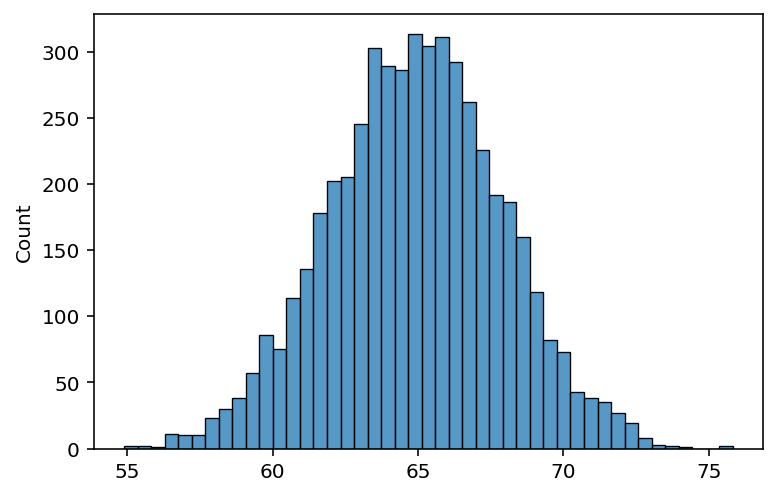

In [4]:
# First, let's simulate a "population" of 5K heights
np.random.seed(seed=10)
pop = np.random.normal(loc = 65, 
                       scale = 3,
                       size = 5000)

p = sns.histplot(x = pop)

In [5]:
# The true mean of this population is as follows
round(pop.mean(), 2)

64.91

### Sampling error in action

We can take a small sample from the population, and compare the mean of that sample (usually denoted with $\bar{X}$) to the mean of the population (usually denoted with $\mu$). 

In [6]:
# Now, let's take a small "sample" from that population.
sample = np.random.choice(pop, 100, replace = False)
# And let's look at the mean of the sample...
print("Sample mean: {X}".format(X = round(sample.mean(), 2)))
print("Population mean: {X}".format(X = round(pop.mean(), 2)))

Sample mean: 65.31
Population mean: 64.91


### Preview: random variables and sampling

- Depending on **sample**, there are many possible values that $\bar{X}$ could take on.  
 - Thus, $\bar{X}$ is a **random variable**, which is sampled from a distribution of possible sample means. 
 - $\bar{X}$ is also an **unbiased estimator** of $\mu$.
- This will become relevant for the Central Limit Theorem later on.

# Part 2: Descriptive Statistics

**Descriptive statistics**: tools for *summarizing* and *organizing* a set of observations.

This includes:

- Measures of **central tendency** 
- Measures of **dispersion** 

Here, we'll also be discussing qualitative assessments of the **shape** of a distribution.

# Measures of central tendency

The three most common measures of central tendency are:

- Mean  
- Median  
- Mode

## Computing the *mean*

The **mean** is defined as the sum of all values, divided by the number of observations.

$\mu = \frac{1}{n} * \sum_{i=1}^{n}{x_i}$

Properties of the mean:

- Can only be used with *quantitative* data.  
- Sum of deviations from the mean = 0.  
- Most affected by outliers / distribution *shape*.  

## Q: How would we calculate the mean of this list?

In [6]:
observations = [2, 4, 3, 3, 7, 10]
observations

[2, 4, 3, 3, 7, 10]

### Use `sum` to calculate the sum, then `len` to get the number of observations.

In [7]:
sum(observations) / len(observations)

4.833333333333333

### With `numpy`, we can call `np.mean(ARRAY)`.

In [8]:
np.mean(observations)

4.833333333333333

### We can also convert it to a `numpy array`.

In [9]:
observations_np = np.array(observations)
observations_np.mean()

4.833333333333333

## Computing the *median*

The **median** is defined as the value separating the upper 50% from the lower 50% of a distribution.

- Order all observations from least to greatest  
- Find the value in the middle  

If there's an *even* number of observations, we take the average of the *middle two*.

The median is **less affected by outliers** (or distribution **skew**) than the mean.

### With `numpy`, we can call `np.median(ARRAY)`.

In [10]:
np.median(observations_np)

3.5

## Computing the *mode*

The **mode** is defined as the most frequent value in a distribution.

Unlike `mean` and `median`, it can be used with qualitative/categorical data. 

### Approach 1: `numpy.unique` 

In [11]:
# First, get COUNTS of each value
vals, counts = np.unique(observations_np, return_counts=True)
print(vals)
print(counts)

[ 2  3  4  7 10]
[1 2 1 1 1]


In [12]:
index = np.argmax(counts)
print(vals[index])

3


### With `scipy.stats`, we can call `scipy.stats.mode(ARRAY)`.

In [13]:
mode = ss.mode(observations_np)
print(mode.mode)
print(mode.count)

[3]
[2]


## Central Tendency and distribution shape

Some measures of central tendency are more affected by **distribution shape** than others.

Which measure of central tendency would be largest for the distribution below?

<AxesSubplot:ylabel='Count'>

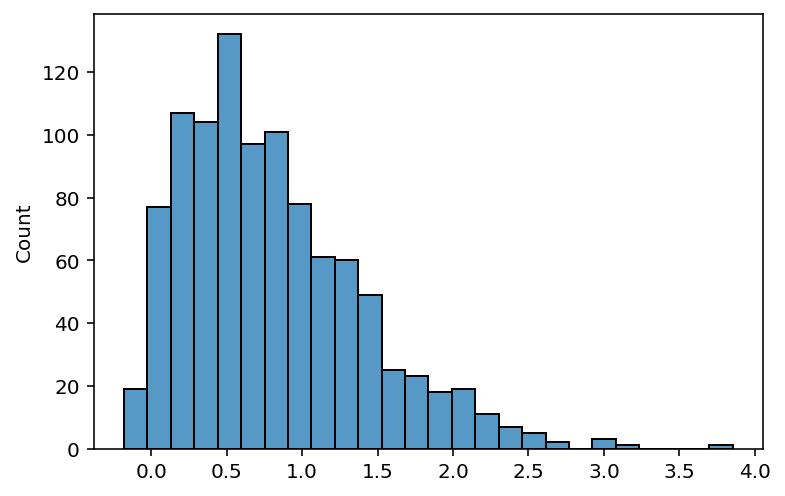

In [14]:
## Generate a skewed distribution
obs_skewed = ss.skewnorm.rvs(10, size = 1000)
sns.histplot(obs_skewed)

#### The mean is more affected than the median.

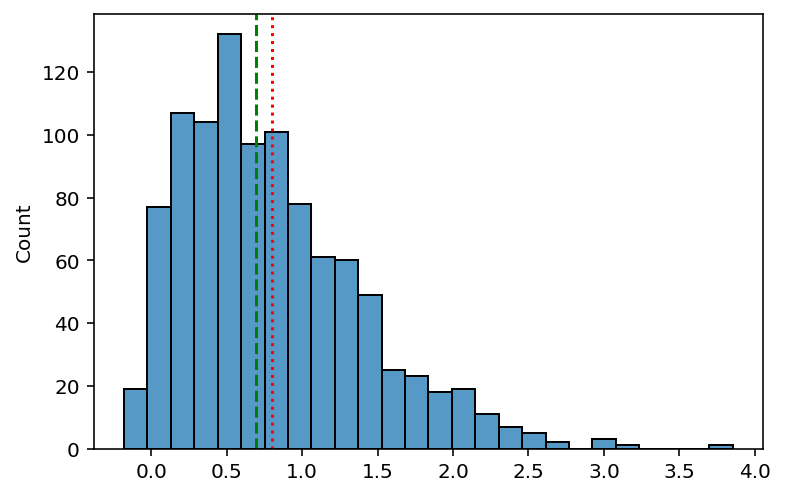

In [15]:
## Plot MEAN vs. MEDIAN of distribution
sns.histplot(obs_skewed)
plt.axvline(obs_skewed.mean(), linestyle = "dotted", color = "red")
plt.axvline(np.median(obs_skewed), linestyle = "dashed", color = "green")

# Distribution Shape

Frequency distributions can have different **shapes**. 

- **Normal Distribution** is very common  
- But many distributions are **skewed**  
- And some distributions are **bimodal** (or trimodal, etc.)

## Normal Distribution

- As we'll see, this distribution is very important for inferential statistics.  
- Defined by a mean ($\mu$) and standard deviation ($\sigma$)  
- The distribution is **symmetric**

<AxesSubplot:ylabel='Count'>

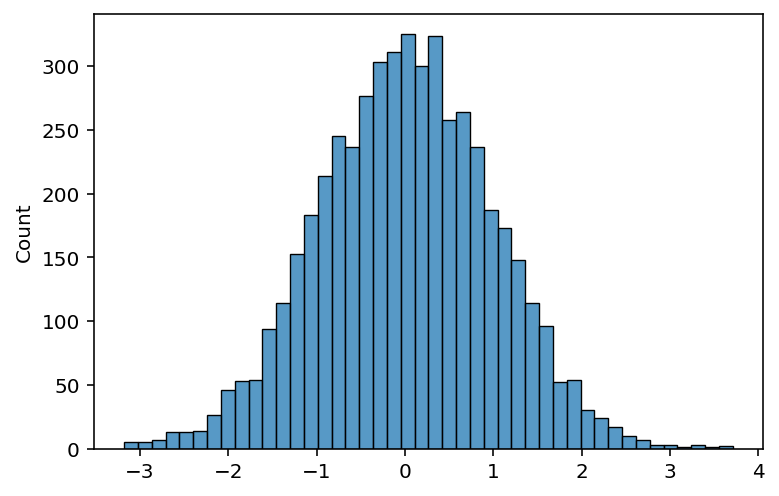

In [16]:
# We can use np.random.normal to make a normal distribution
pop = np.random.normal(loc = 0, scale = 1,size = 5000)

sns.histplot(x = pop)

## Distribution skew

**Skew** is when extreme values elongate the "tail" of a distribution.

- Positive skew ("right-skewed"): extreme values on the right tail  
- Negative skew ("left-skewed"): extreme values on the left tail

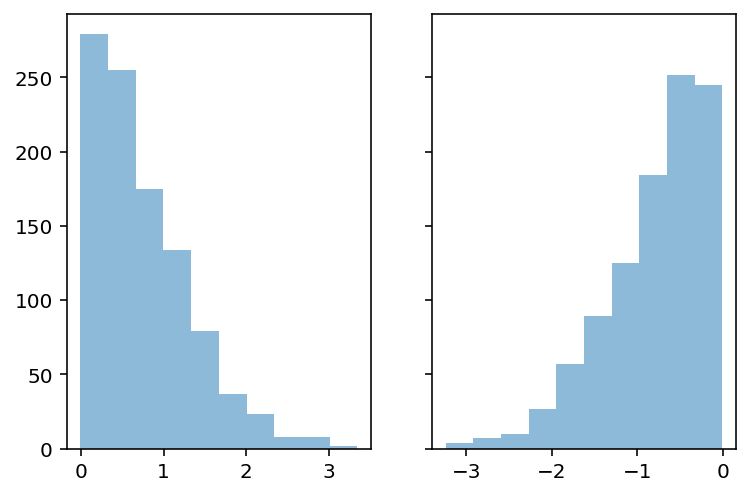

In [17]:
## Generate a skewed distribution
rskew = ss.skewnorm.rvs(100, size = 1000)
lskew = ss.skewnorm.rvs(-100, size = 1000)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
L = ax1.hist(rskew, alpha = .5)
R = ax2.hist(lskew, alpha = .5)

## Multimodal distribution

- A **multimodal distribution** (as the name implies) has multiple **modes** or peaks. 
- Sometimes suggests distinct **generative processes** giving rise to data.

<AxesSubplot:ylabel='Count'>

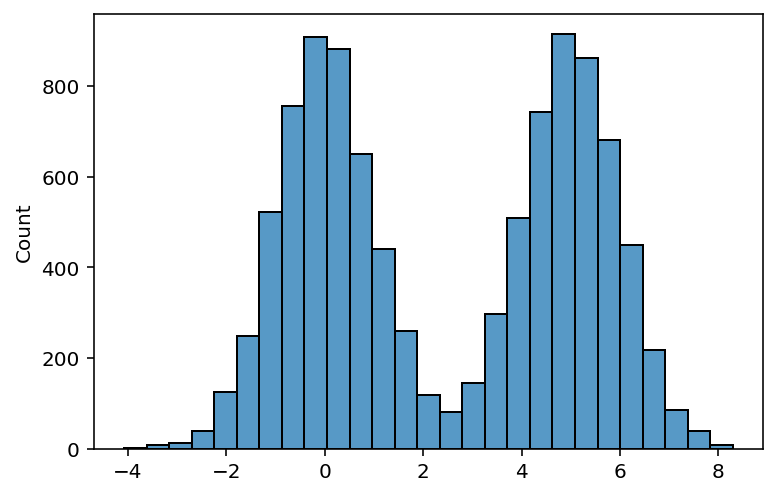

In [18]:
# Make two normal distributions, then put them together.
pop1 = np.random.normal(loc = 0, scale = 1,size = 5000)
pop2 = np.random.normal(loc = 5, scale = 1,size = 5000)
pop_all = np.concatenate((pop1, pop2))

sns.histplot(x = pop_all)

# Measures of dispersion

**Dispersion** (or **variability**) is the degree to which measures in a distribution are "spread out" or **dispersed**.

- Averages only tell part of the story!  
- Common measures:  
 - Range  
 - Standard deviation

## Range

**Range** is defined as the difference between the maximum and minimum values in a distribution.

- Advantage: Very intuitive.
- Limitation: Only accounts for *two scores* in a distribution.  

In [19]:
rng = max(observations_np) - min(observations_np)
print("Range: {X}".format(X=rng))

Range: 8


## Standard Deviation

**Standard Deviation** is the typical amount that scores **deviate** from the mean of a distribution.

- Critical for both descriptive and inferential statistics  
- As with mean, different notation for sample ($s$ or $SD$) vs. population ($\sigma$)

## Calculating SD 

Two distinct formulas, depending on whether you're measuring **population** or **sample**. 

Let's start with population SD:

$\sigma = \sqrt{\frac{SS_{X}}{N}}$

Where:

- $SS_X$ is the **sum of squares** of X.  
- $N$ is the number of observations.

### Understanding Sum of Squares

The **sum of squares** is the sum of *squared deviations* between each score in $X$ and the mean of $X$.

$SS_X = \sum_{i}^{N}(x_i - \mu)^2$

In [20]:
ssx = sum((observations_np - observations_np.mean())**2)
ssx

46.833333333333336

In [21]:
## Then divide SSX by N and take SQRT
pop_SD = math.sqrt(ssx/observations_np.size)
pop_SD

2.793842435706702

### Calling `np.std`

Note that this will by default calculate the **population standard deviation**!

In [22]:
observations_np.std()

2.793842435706702

### Sample SD

If we use the same formula on a **sample**, we'll tend to *underestimate* the population standard deviation ($\sigma$).

- I.e., this formula is a **biased estimator** of $\sigma$.
- Instead, we add a **correction* ($n-1$) for this bias.  

$SD = \sqrt{\frac{SS_{X}}{n-1}}$

See [this paper](https://www.tandfonline.com/doi/pdf/10.1080/00494925.1979.11972378?casa_token=8-_5sCulE1QAAAAA:8NZORA5O9N-hPW7C6rjA2MtIfOXApotz5blAzqjU94SWhrqxFvnwsmjPOJMLpBU7BgyExrzvH0c) and more for details on why $n-1$.

In [23]:
## For sample. divide by n - 1 instead
sample_SD = math.sqrt(ssx/(observations_np.size-1))
sample_SD

3.0605010483034745

In [24]:
## Compare to numpy output
np.std(observations_np, ddof=1)

3.0605010483034745

### Check-in: what does it mean to say something is a "biased" estimator?

# Introducing the z-score

A **z-score** is a standardized measure of how many any given point deviates from the mean:

$Z = \frac{X - \mu}{\sigma}$

This allows us to quantify the **distance** (in standardized units) between a point and the mean.

In [25]:
observations_z = (observations_np - observations_np.mean())/observations_np.std()
observations_z

array([-1.01413498, -0.29827499, -0.65620498, -0.65620498,  0.77551498,
        1.84930496])

### Check-in:

- What can we infer about an observation if its z-score $>0$?
- What about if its z-score $<0$?

## Standard normal distribution

The **standard normal distribution** is the result of **z-scoring** a normal distribution, which yields a distribution with the following parameters:  

- $\mu = 0$
- $\sigma = 1$

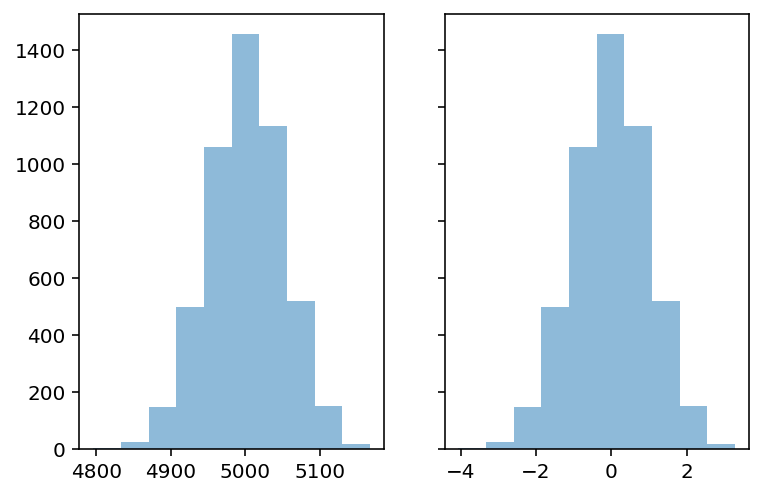

In [26]:
# First, make a normal distribution
pop = np.random.normal(loc = 5000, scale = 50,size = 5000)
# Now, z-score it 
pop_z = (pop - pop.mean()) / pop.std()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
og = ax1.hist(pop, alpha = .5)
og_z = ax2.hist(pop_z, alpha = .5)

### The standard normal distribution and probabilities


The standard normal distribution is well-defined in terms of the **probability** of different values of $z$. 

- I.e., most ($68.2\%$ of points fall within $z = [-1, 1]$)  
- Very few ($<5\%$ of points fall beyond $z > 3$ or $z < -3$.) 

This is relevant for: 

- Confidence intervals.
- Inferential statistics.

#### Defining the standard normal distribution  

In [27]:
s_norm = ss.norm(loc = 0, scale = 1)
s_norm

#### Now, we can use `s_norm.cdf(X)` to calculate $p(≤X)$

**Check-in**: Why is $p(≤X) = .5$?

In [28]:
s_norm.cdf(0)

0.5

### Check-in: how would we calculate the probability *between* $-1$ and $1$?

### Answer

Subtract the probability of obtaining $p(X ≤-1)$ from $p(X ≤ 1)$. 

In [29]:
s_norm.cdf(1) - s_norm.cdf(-1)

0.6826894921370859

### This concept will be very important later on!

# Part 3: Sampling Distributions

## Samples and Estimators

- Often, we're interested in more than just *describing a sample*.  
- Rather, we want to **generalize** from a sample to a population.
- More formally: we **estimate** the *population parameter* ($\mu$) from a *sample statistic* ($\bar{X}$)

## Check-in

What does it mean for $\bar{X}$ to be an **unbiased estimate** of $\mu$?

## Sampling distributions

- $\bar{X}$ is not *identical* to $\mu$  
- But if we took many samples from $\mu$, the distribution of **sample means** would be **normally distributed** around $\mu$. 
 - Hence, on average, it's *unbiased*: the **mean** of this distribution is equal to $\mu$.  
- The distribution of *all possible* samples of size $n$ is called a **sampling distribution**.

#### Illustration of sampling distribution

First, we simulate a ground gruth population.

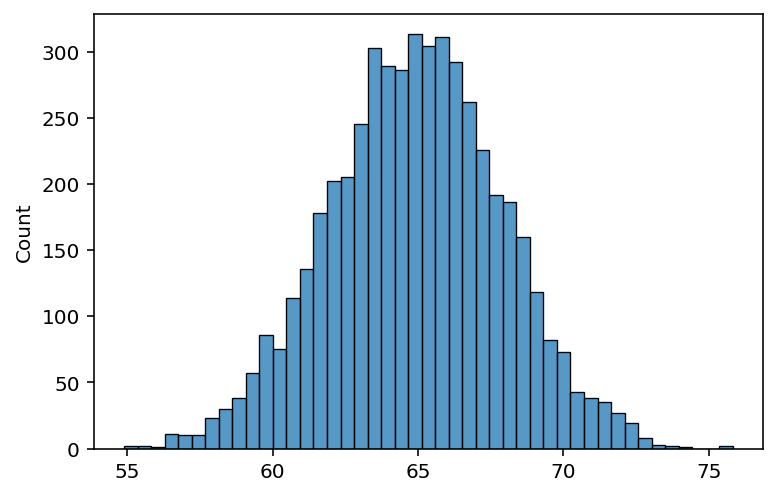

In [30]:
np.random.seed(seed=10)
pop = np.random.normal(loc = 65, scale = 3, size = 5000)
g = sns.histplot(pop)

#### Illustration of sampling distribution

Now, we sample from that population 300 times, with each sample size $n = 5$. What do we notice about the distribution of those sample means? (Note this is not a "true" sampling distribution in that it's not every possible sample.)

Text(0.5, 0, 'Sample mean (n = 5)')

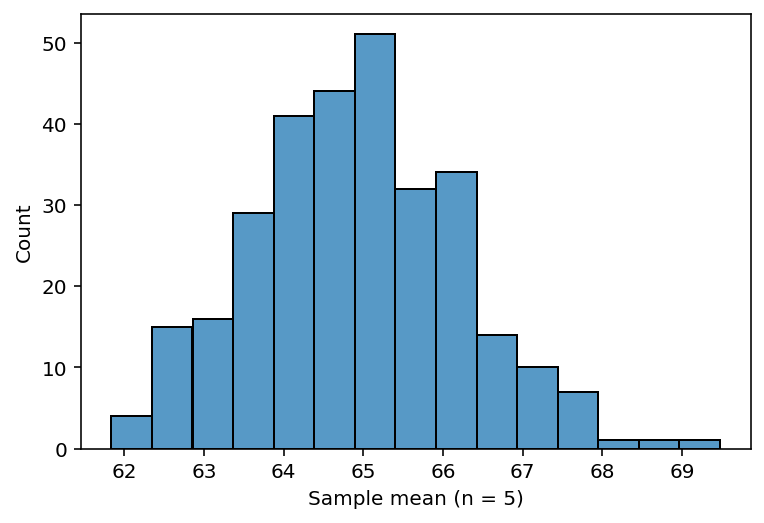

In [31]:
sample_means_n5 = []
for _ in range(300):
    sample = np.random.choice(pop, size = 5, replace = False)
    sample_means_n5.append(sample.mean())
    
g = sns.histplot(sample_means_n5)
plt.xlabel("Sample mean (n = 5)")

## Why $n$ matters

Now let's compare several distributions:  

- The original population  
- Sampling distribution with $n = 15$  
- Sampling distribution with $n = 40$

### Collecting sample means with $n=40$

In [32]:
sample_means_n40 = []
for _ in range(300):
    sample = np.random.choice(pop, size = 40, replace = False)
    sample_means_n40.append(sample.mean())

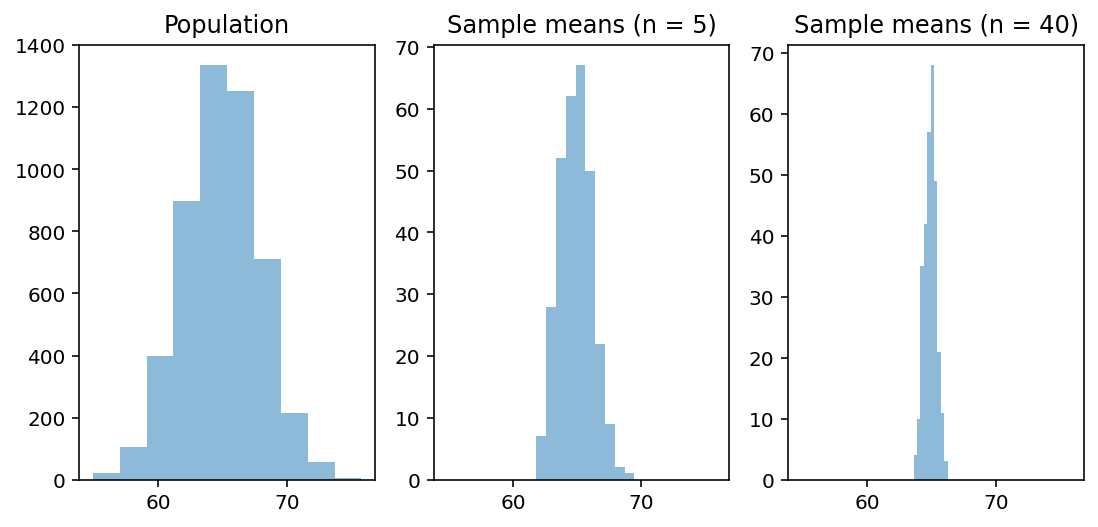

In [33]:
## Now, we visualize them altogether
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True)
f.set_figwidth(9)
og = ax1.hist(pop, alpha = .5)
ax1.title.set_text("Population")
og_s1 = ax2.hist(sample_means_n5, alpha = .5)
ax2.title.set_text("Sample means (n = 5)")
og_s2 = ax3.hist(sample_means_n40, alpha = .5)
ax3.title.set_text("Sample means (n = 40)")

## Why $n$ matters

As $n$ increases: 

- Sampling distribution looks increasingly **normal**  
- The variance of our sampling distribution **decreases**. 

This is, in essence, the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

## Check-in

Would this apply to non-normal distributions, such as a right-skewed distribution?

## Answer: Yes! 

Even for a skewed population, the distribution of sample means will be normal (and increasingly so as $n$ increases).

- See today's lab for more examples of sampling distributions

### Why do sampling distributions matter?

As we'll see, the notion of a **sampling distribution**––and the Central Limit Theorem––is central to:

- Calculating confidence intervals.
- Null Hypothesis Significance Testing.


# Part 4: Confidence intervals

So far, we've primarily discussed **point estimates**.

- A single-value estimate of a **parameter**.  
- Mean, median, etc.

But we can also give an **interval**, within which the true parameter might lie. 
- Example: $\bar{X} = 5$, with a $95\%$ confidence interval of $[3, 7]$. 

## Introducing standard error

- To calculate a confidence interval, we need to know the **standard error** of the mean.  
- This tells us (roughly) how different $\mu$ is likely to be from $\sigma$.
- **Standard error** is defined as:

$SE = \frac{\sigma}{\sqrt{n}}$

(If $\sigma$ is unknown, use sample $SD$ instead.)

### Check-in: What is one important way in which SE is different from $\sigma$?

### Answer 1

- $SD$ is a measure of variability within a sample.  
- $SE$ is a measure of variability *across samples*, i.e., variability within your **sampling distribution**.  



### Answer 2: Unlike $\sigma$, SE depends on $n$.

- As $n$ increases, $SE$ decreases (whereas $\sigma$ does not).  
- This is directly rooted in the **Central Limit Theorem**!



Text(0, 0.5, 'Standard Error')

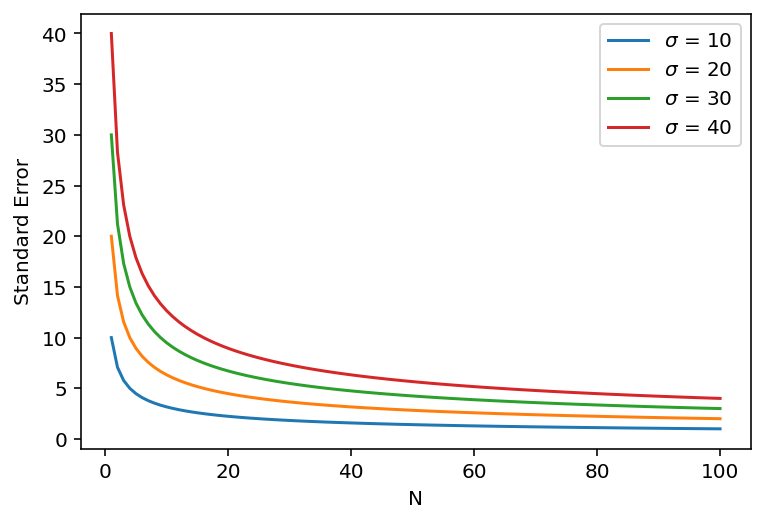

In [34]:
Ns = np.linspace(1, 100, num = 100)
for sigma in [10, 20, 30, 40]:
    se = sigma / np.sqrt(Ns)
    plt.plot(Ns, se, label = "$\sigma$ = {x}".format(x=sigma))
plt.legend()
plt.xlabel("N")
plt.ylabel("Standard Error")

## How to use standard error? (Pt. 1)

A common way to use standard error is to **report** it alongside the sample mean:

> The mean of our sample was $25$, $\pm 3.5$ (SE).  

That "$\pm$" symbol just indicates some **uncertainty** about our sample statistic.  

## How to use standard error? (Pt. 2)

You can also use standard error to calculate a **confidence interval** (or **CI**). 

- Note: there are *many* ways to calculate a CI
 - Also much [debate](https://www.bmj.com/content/366/bmj.l5381.full) about the term itself; some prefer "uncertainty interval".    
 - Also [many](http://www.ejwagenmakers.com/inpress/HoekstraEtAlPBR.pdf) misconceptions about what it means.  
 - So if this is confusing, you're in good company!
- For today, we will focus on a **frequentist** definition.  
 - What it **is** and what it **is not**.  

## So what is a confidence interval?

From [Hoekstra et al (2014)](http://www.ejwagenmakers.com/inpress/HoekstraEtAlPBR.pdf):

>  A CI is a numerical interval constructed around the estimate of a parameter...we may find that a particular procedure, when used repeatedly across a series of hypothetical data sets (i.e., the sample space), yields intervals that contain the true parameter value in 95 % of the cases. When such a procedure is applied to a particular dataset, the resulting interval is said to be a 95 % CI.

Put another way:

- Across *all* possible samples constructed this way (e.g., with a particular value of $n$)...
- ...what **proportion** of CIs calculated for those samples would contain the true population parameter?

## Calculating a confidence interval

The confidence interval (CI) for a particular "confidence" level is defined as:

$CI = [\bar{X} - z\frac{SD}{\sqrt{n}}, \bar{X} + z\frac{SD}{\sqrt{n}}]$

A couple things to notice:

- $\frac{SD}{\sqrt{n}}$ is just **standard error**.  
- $\bar{X}$ is our sample mean: this formula gives us an **interval** around the sample mean.  
- The value of $z$ will depend on our desired "confidence" level.  

## Choosing a value of $z$ 

The value of $z$ can be derived from our **standard normal distribution**.  

Example:

- $68.2\%$ of values fall between $[-1, 1]$.
- Thus, a $68.2\%$ CI would use $z = 1$.  

### The 95% CI

Often, researchers use a $95\%$ CI. In this case, $z = 1.96$.

In [35]:
s_norm.cdf(1.96) - s_norm.cdf(-1.96)

0.950004209703559

### Check-in:

Construct a 95% confidence interval using the following information:

- Our sample mean is $10$.  
- Our sample standard deviation is 2.  
- Our sample size is 20.  

### Answer

- We want 95% CI, so we use $z = 1.96$.  
- Calculate $SE = \frac{SD}{\sqrt{n}}$  
- Use the formula provided:

$CI = [\bar{X} - z*SE, \bar{X} + z*SE]$



In [37]:
#### Example code
x_bar = 10
se = 2 / math.sqrt(20)
z = 1.96
ci_lower = round(x_bar - z*se, 2)
ci_upper = round(x_bar + z*se, 2)

print("CI is [{l}, {h}]".format(l = ci_lower, h = ci_upper))

CI is [9.12, 10.88]


## What this is *not*

There are many [common misconceptions](http://www.ejwagenmakers.com/inpress/HoekstraEtAlPBR.pdf) about what a CI means.

A CI is **not**:

- A statement about the *range* of observed scores in the sample.  
- A statement about the *probability* that the true mean lies within some interval.

Much more we could discuss, but hopefully this is a good start!

# Conclusion

This concludes the introduction to NHST! Hopefully now, you can:

- **Implement** several basic descriptive statistics in Python  
- **Describe** properties of a distribution (e.g., skew, etc.)  
- **Calculate** a confidence interval.  
